In [2]:
#Imports
import numpy as np
import pandas as pd
import sklearn as scikit
import seaborn as sns
from matplotlib import pyplot as plt
import re
from math import isnan
from datetime import datetime
from math import isnan
import sklearn.model_selection as ms
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing

# Part 1: Reading in data and selecting features

In [3]:
#Read in master csv
master = pd.read_csv("new_weather_master.csv")

#Converting features to separate dataframe
main_features = master[['dt_iso','city_name', 'temp', 'humidity', 'wind_speed', 'rain_3h', 'clouds_all']]
main_features.rename(columns={'dt_iso': 'datetime', 'city_name': 'city', 'wind_speed': 'windspeed', 'clouds_all': 'cloudiness', 'rain_3h': 'rain3h'}, inplace=True)


#Cleaning up columns
dateSplit = lambda entry: entry.split(" ")[0]
main_features['date'] = main_features.datetime.apply(dateSplit)

def timeSplit(entry):
    s1 = entry.split(" ")[0]
    s1 = s1.split("-")
    s1 = reversed(s1)
    s1 = '/'.join(s1)
    s2 = entry.split(" ")[1]
    s3 = s1 + " " + s2
    return datetime.strptime(s3, "%d/%m/%Y %H:%M:%S")

def cloudinessNormalizer(entry):
    cloudiness = entry
    if cloudiness < 10:
        cloudiness = 0
    elif cloudiness > 10 and cloudiness < 20:
        cloudiness = 1
    elif cloudiness > 20 and cloudiness < 30:
        cloudiness = 2
    elif cloudiness > 30 and cloudiness < 40:
        cloudiness = 3
    elif cloudiness > 40 and cloudiness < 50:
        cloudiness = 4
    elif cloudiness > 50 and cloudiness < 60:
        cloudiness = 5
    elif cloudiness > 60 and cloudiness < 70:
        cloudiness = 6
    elif cloudiness > 70 and cloudiness < 80:
        cloudiness = 7
    elif cloudiness > 80 and cloudiness < 90:
        cloudiness = 8
    elif cloudiness > 90 and cloudiness <= 100:
        cloudiness = 9
    else:
        cloudiness = 10
    return cloudiness

main_features['time'] = main_features.datetime.apply(timeSplit)


#Changing date to a datetime object for easier selection
convertDateTime = lambda date: np.array(date, dtype=np.datetime64)
main_features['date'] = main_features.date.apply(convertDateTime)
main_features['rain3h'].fillna(value=0, inplace=True)
main_features['cloudiness'].apply(cloudinessNormalizer)
main_features.drop(columns=['datetime'], inplace=True)
print(main_features.columns)


C:\Users\docto\miniconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\docto\miniconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\docto\miniconda3\lib\site-packages\ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

Index(['city', 'temp', 'humidity', 'windspeed', 'rain3h', 'cloudiness', 'date',
       'time'],
      dtype='object')


C:\Users\docto\miniconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [20]:
print(main_features.cloudiness.unique())
#Tried converting cloudiness using function in main cell, not sure why not working

[ 40   1  90  75  20  48  65  79  98  80  39  91 100  99  96  21  26  16
  31  29  33  28   2   5  18  63  70  93  97  78  57  77   3  89  45  14
  13  35  72  44  36  52  19   7  53  62  92  94  84   0  12  87  69  59
  24  34   4  51  41  27  83  68  30  82  76  88  95  58  61  23   9  74
   8  15  22  55  37  32  73  56  85  50  43  86  10  47  49  42  25  17
  81  67  46  11   6  38  54  64  60  71  66]


In [5]:
print(main_features.humidity.unique())

[ 87  93 100  76  82  71  86  92  81  66  67  58  55  62  89  88  45  51
  59  91  72  63  48  40  46  54  80  70  43  57  61  75  69  74  65  49
  53  50  47  56  60  52  37  34  39  41  42  44  36  32  31  38  33  29
  25  21  20  18  26  22  27  77  64  35  28  24  30  68  90  95  97  85
  83  94  13  14  17  23  19  73  96  84  16  15  78  98  79  99  12   8
   9  10  11   6   7   5]


# Part 2: Selecting rows for historical fires and storing them in new datasets

In [ ]:
print(main_features['rain3h'].count())
main_features.to_csv('main_features')

In [6]:
"""Part 2: Selecting rows for historical fires and storing them in new dataframes"""
len_firedata = 0
#Loma Fire of 2009
#Start: October 25, 2009
#Contained: October 27, 2009
#Size: 485 Acres
#Location: Loma Chiquita
#Fire Over 1000 Label: 0
LomaFire2009 = main_features.copy()
startDate = np.array('2009-10-25', dtype=np.datetime64)
lstartDate = startDate + np.arange(3)
LomaFire2009 = LomaFire2009[(LomaFire2009.city == 'Loma Chiquita') & (LomaFire2009.date.isin(lstartDate))]
LomaFire2009['1000Acres'] = 1
LomaFire2009['ID'] = "Loma2009"
LomaFire2009['droughtIndex'] = 295
LomaFire2009['rain3h'].fillna(value=0, inplace=True)
len_firedata += len(LomaFire2009)
display(LomaFire2009)
print(LomaFire2009[['temp', 'windspeed', 'humidity', 'rain3h', 'cloudiness']].isnull().sum())
#Whitehurst Fire of 2008
#Start: June 21, 2008
#Contained: June 23, 2008
#Size: 200 Acres
#Location: Hecker Pass
#Fire Over 1000 Label: 0
WhitehurstFire2008 = main_features.copy()
startDate = np.array('2008-06-21', dtype=np.datetime64)
wstartDate = startDate + np.arange(3)
WhitehurstFire2008 = WhitehurstFire2008[(WhitehurstFire2008.city == 'Hecker Pass') & (WhitehurstFire2008.date.isin(wstartDate))]
WhitehurstFire2008['1000Acres'] = 0
WhitehurstFire2008['ID'] = "Whitehurst2008"
WhitehurstFire2008['rain3h'].fillna(value=0, inplace=True)
WhitehurstFire2008['droughtIndex'] = 200
len_firedata += len(WhitehurstFire2008)
#Summit Fire of 2008
#Start: May 22, 2008
#Contained: May 27, 2008
#Size: 4270 Acres
#Location: Sveadal
#Fire Over 1000 Label: 1
SummitFire2008 = main_features.copy()
startDate = np.array('2008-05-22', dtype=np.datetime64)
sstartDate = startDate + np.arange(6)
SummitFire2008 = SummitFire2008[(SummitFire2008.city == 'Sveadal') & (SummitFire2008.date.isin(sstartDate))]
SummitFire2008['1000Acres'] = 1
SummitFire2008['ID'] = "Summit2008"
SummitFire2008['rain3h'].fillna(value=0, inplace=True)
SummitFire2008['droughtIndex'] = 100
len_firedata += len(SummitFire2008)
#Loma Fire of 2016
#Start: September 26, 2016
#Contained: October 12, 2016
#Size: 4474 Acres
#Location: Loma Chiquita
#Fire Over 1000 Label: 1
LomaFire2016 = main_features.copy()
startDate = np.array('2016-09-26', dtype=np.datetime64)
l2startDate = startDate + np.arange(17)
LomaFire2016 = LomaFire2016[(LomaFire2016.city == 'Loma Chiquita') & (LomaFire2016.date.isin(l2startDate))]
LomaFire2016['1000Acres'] = 1
LomaFire2016['ID'] = "Loma2016"
LomaFire2016['rain3h'].fillna(value=0, inplace=True)
LomaFire2016['droughtIndex'] = 295
len_firedata += len(LomaFire2016)
#Croy Fire of 2002
#Start: September 23, 2002
#End: September 29, 2002
#Size: 3127 Acres
#Location: Sveadal
#Fire Over 1000 Label: 1
CroyFire2002 = main_features.copy()
startDate = np.array('2002-09-23', dtype=np.datetime64)
cstartDate = startDate + np.arange(7)
CroyFire2002 = CroyFire2002[(CroyFire2002.city == 'Loma Chiquita') & (CroyFire2002.date.isin(cstartDate))]
CroyFire2002['1000Acres'] = 1
CroyFire2002['ID'] = "Croy2002"
CroyFire2002['rain3h'].fillna(value=0, inplace=True)
CroyFire2002['droughtIndex'] = 100
len_firedata += len(CroyFire2002)

,city,temp,humidity,windspeed,rain3h,cloudiness,date,time,1000Acres,ID,droughtIndex
230193,Loma Chiquita,63.54,83,5.82,0.0,1,2009-10-25,2009-10-25 00:00:00,1,Loma2009,295
230194,Loma Chiquita,61.45,86,4.70,0.0,1,2009-10-25,2009-10-25 01:00:00,1,Loma2009,295
230195,Loma Chiquita,58.73,96,5.82,0.0,90,2009-10-25,2009-10-25 02:00:00,1,Loma2009,295
230196,Loma Chiquita,57.52,93,5.12,0.0,90,2009-10-25,2009-10-25 03:00:00,1,Loma2009,295
230197,Loma Chiquita,57.11,100,3.36,0.0,90,2009-10-25,2009-10-25 04:00:00,1,Loma2009,295
...,...,...,...,...,...,...,...,...,...,...,...
230260,Loma Chiquita,61.61,26,12.75,0.0,1,2009-10-27,2009-10-27 19:00:00,1,Loma2009,295
230261,Loma Chiquita,62.65,27,9.17,0.0,1,2009-10-27,2009-10-27 20:00:00,1,Loma2009,295
230262,Loma Chiquita,63.82,24,10.29,0.0,1,2009-10-27,2009-10-27 21:00:00,1,Loma2009,295
230263,Loma Chiquita,63.50,23,13.87,0.0,1,2009-10-27,2009-10-27 22:00:00,1,Loma2009,295


temp          0
windspeed     0
humidity      0
rain3h        0
cloudiness    0
dtype: int64


# Part 3: Exploratory Data Analysis

### Feature 1: Temperature

In [13]:
wildfires = pd.concat([LomaFire2009, WhitehurstFire2008, SummitFire2008, LomaFire2016, CroyFire2002])
wildfires.temp = wildfires['temp'].astype(int)
tempMean = wildfires.groupby("ID").temp.apply(np.mean)
tempMedian = wildfires.groupby("ID").temp.apply(np.median)

In [ ]:

tempMax = wildfires.groupby("ID").temp.apply(np.max)
tempMin = wildfires.groupby("ID").temp.apply(np.min)
"""
temp25 = wildfires.groupby("ID").temp.apply(np.percentile(wildfires.temp, 25))
temp75 = wildfires.groupby("ID").temp.apply(np.percentile(wildfires.temp, 75))
tempStd = wildfires.groupby("ID").temp.apply(np.std)
"""

"""
print("Mean", tempMean, "\n")
print("Median", tempMedian, "\n")
print("Max", tempMax, "\n")
print("Min", tempMin, "\n")
#print("25", temp25)
#print("75", temp75)
print("Std", tempStd, "\n")
"""


In [ ]:
print(wildfires.temp.dtype)

#wildfires.quantile(0.25, numeric_only=False)
#temp25 = wildfires.groupby("ID").temp.apply(np.quantile(wildfires.temp, .25))
#temp75 = wildfires.groupby("ID").temp.apply(np.percentile(wildfires.temp, 75))
#tempStd = wildfires.groupby("ID").temp.apply(np.std)

### Feature 2: Humidity

In [ ]:
humidityMean = wildfires.groupby("ID").humidity.apply(np.mean)
humidityMedian = wildfires.groupby("ID").humidity.apply(np.median)
humidityMax = wildfires.groupby("ID").humidity.apply(np.max)
humidityMin = wildfires.groupby("ID").humidity.apply(np.min)
#humidity25 = wildfires.groupby("ID").humidity.apply(np.percentile(wildfires.humidity, 25))
#humidity75 = wildfires.groupby("ID").humidity.apply(np.percentile(wildfires.humidity, 75))
humidityStd = wildfires.groupby("ID").humidity.apply(np.std)

print("Mean", humidityMean, "\n")
print("Median", humidityMedian, "\n")
print("Max", humidityMax, "\n")
print("Min", humidityMin, "\n")
#print("25", humidity25)
#print("75", humidity75)
print("Std", humidityStd, "\n")


### Feature 3: Wind Speed

In [ ]:
windSpeedMean = wildfires.groupby("ID").windspeed.apply(np.mean)
windSpeedMedian = wildfires.groupby("ID").windspeed.apply(np.median)
windSpeedMax = wildfires.groupby("ID").windspeed.apply(np.max)
windSpeedMin = wildfires.groupby("ID").windspeed.apply(np.min)
#windSpeed25 = wildfires.groupby("ID").windspeed.apply(np.percentile(wildfires.windspeed, 25))
#windSpeed75 = wildfires.groupby("ID").windspeed.apply(np.percentile(wildfires.windspeed, 75))
windSpeedStd = wildfires.groupby("ID").windspeed.apply(np.std)

print("Mean", windSpeedMean, "\n")
print("Median", windSpeedMedian, "\n")
print("Max", windSpeedMax, "\n")
print("Min", windSpeedMin, "\n")
#print("25", windSpeed25)
#print("75", windSpeed75)
print("Std", windSpeedStd, "\n")


### Feature 4: Cloudiness

In [ ]:
cloudinessMean = wildfires.groupby("ID").cloudiness.apply(np.mean)
cloudinessMedian = wildfires.groupby("ID").cloudiness.apply(np.median)
cloudinessMax = wildfires.groupby("ID").cloudiness.apply(np.max)
cloudinessMin = wildfires.groupby("ID").cloudiness.apply(np.min)
#cloudiness25 = wildfires.groupby("ID").cloudiness.apply(np.percentile(wildfires.cloudiness, 25))
#cloudiness75 = wildfires.groupby("ID").cloudiness.apply(np.percentile(wildfires.cloudiness, 75))
cloudinessStd = wildfires.groupby("ID").cloudiness.apply(np.std)
  
print("Median", cloudinessMedian, "\n")
print("Mean", cloudinessMean, "\n")
print("Max", cloudinessMax, "\n")
print("Min", cloudinessMin, "\n")
#print("25", cloudiness25)
#print("75", cloudiness75)
print("Std", cloudinessStd, "\n")

### Feature 5: Rainfall in last 3 hours

In [ ]:
rain3hMean = wildfires.groupby("ID").rain3h.apply(np.mean)
rain3hMedian = wildfires.groupby("ID").rain3h.apply(np.median)
rain3hMax = wildfires.groupby("ID").rain3h.apply(np.max)
rain3hMin = wildfires.groupby("ID").rain3h.apply(np.min)
#rain3h25 = wildfires.groupby("ID").rain3h.apply(np.percentile(wildfires.rain3h, 25))
#rain3h75 = wildfires.groupby("ID").rain3h.apply(np.percentile(wildfires.rain3h, 75))
rain3hStd = wildfires.groupby("ID").rain3h.apply(np.std)

print("Median", rain3hMedian, "\n")
print("Mean", rain3hMean, "\n")
print("Max", rain3hMax, "\n")
print("Min", rain3hMin, "\n")
#print("25", rain3h25)
#print("75", rain3h75)
print("Std", rain3hStd, "\n")

## Time Series Graphs

### Temperature

Text(0.5, 1.0, 'Croy Fire 2002 Temperature vs TimeSeries')

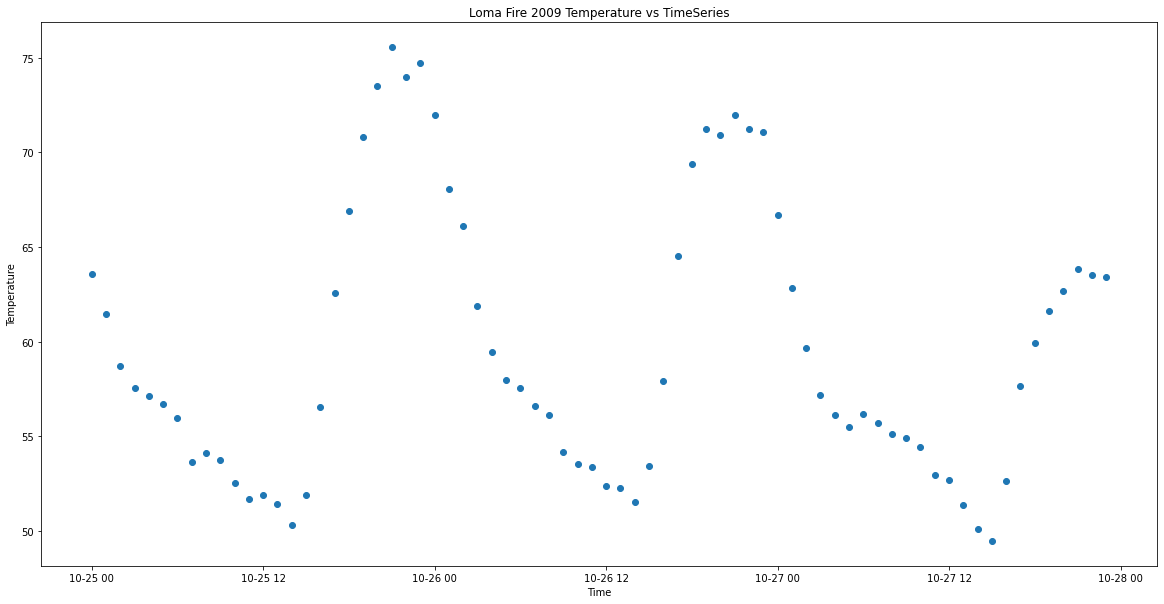

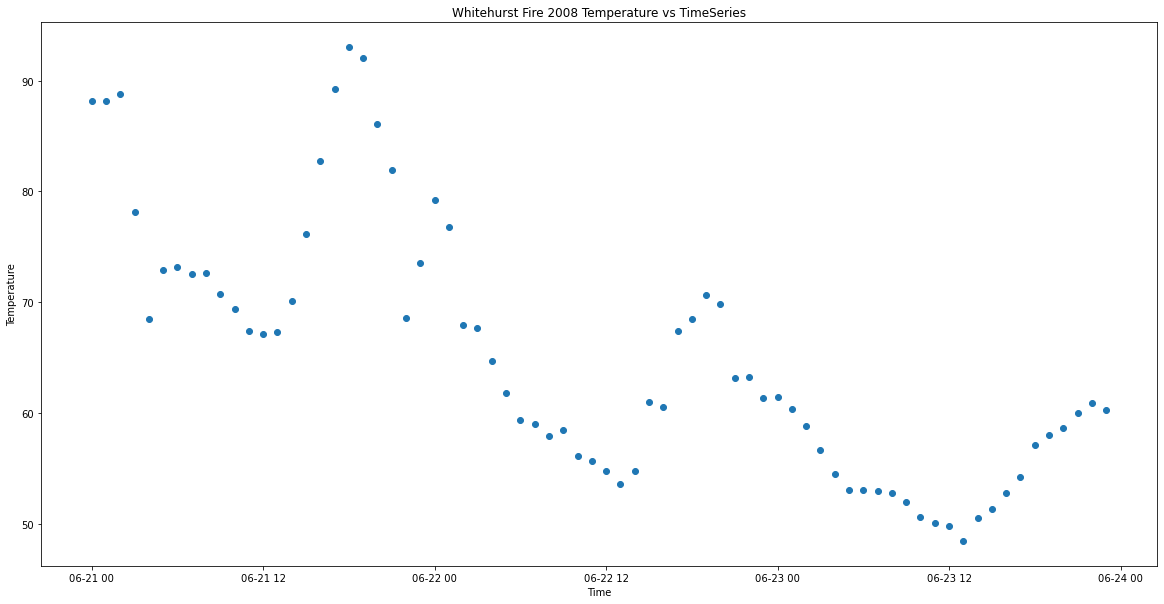

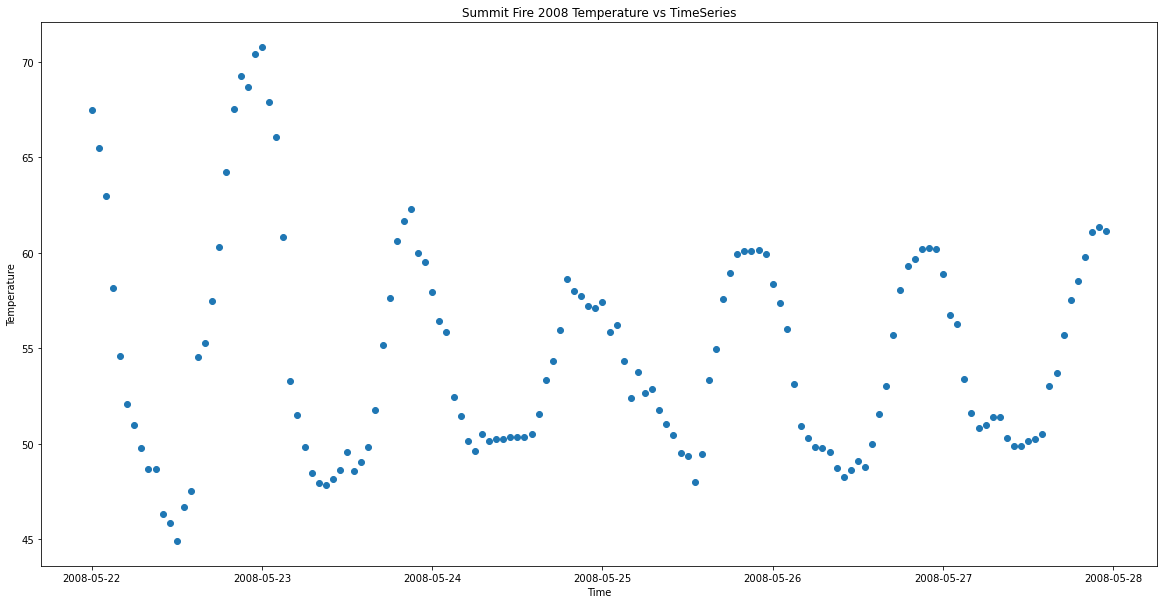

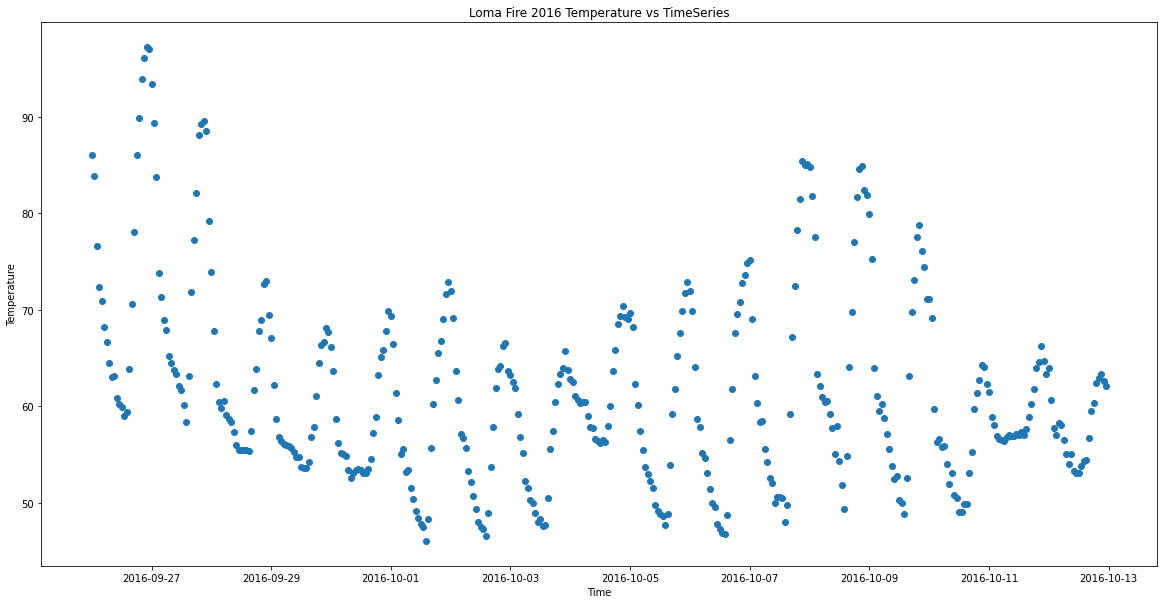

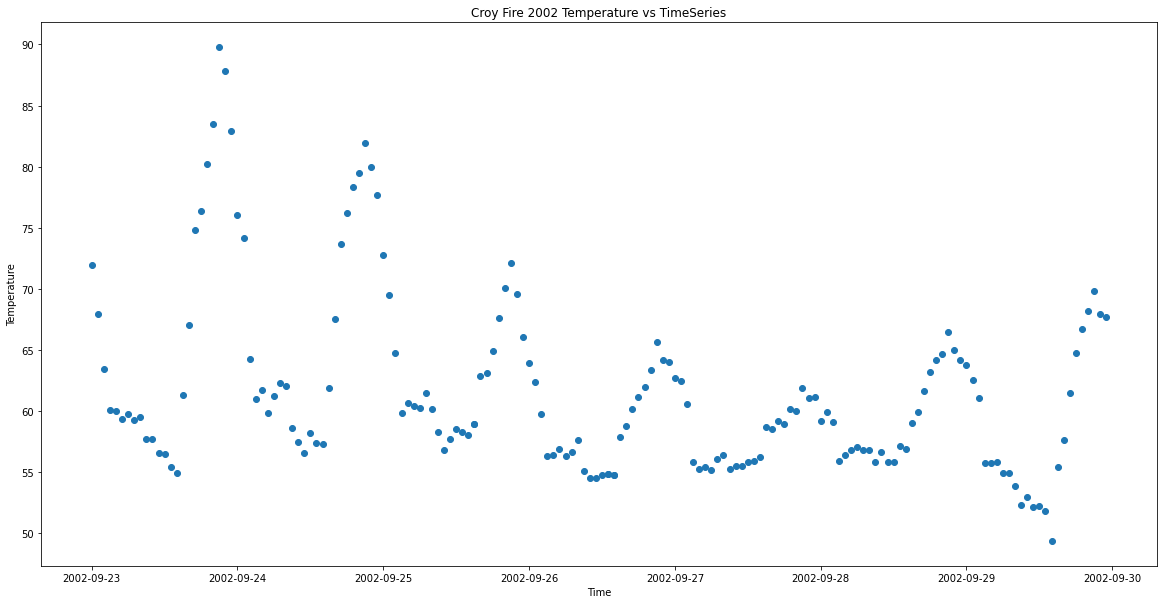

In [7]:
#Loma Fire 2009
plt.figure(figsize=(20, 10))
plt.plot_date(LomaFire2009['time'], LomaFire2009['temp'], fmt='o', tz=None, xdate=True)
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.title("Loma Fire 2009 Temperature vs TimeSeries")
#Whitehurst Fire 2008

plt.figure(figsize=(20, 10))
plt.plot_date(WhitehurstFire2008['time'], WhitehurstFire2008['temp'], fmt='o', tz=None, xdate=True)
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.title("Whitehurst Fire 2008 Temperature vs TimeSeries")
#Summit Fire 2008

plt.figure(figsize=(20, 10))
plt.plot_date(SummitFire2008['time'], SummitFire2008['temp'], fmt='o', tz=None, xdate=True)
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.title("Summit Fire 2008 Temperature vs TimeSeries")
#Loma Fire 2016

plt.figure(figsize=(20, 10))
plt.plot_date(LomaFire2016['time'], LomaFire2016['temp'], fmt='o', tz=None, xdate=True)
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.title("Loma Fire 2016 Temperature vs TimeSeries")
#Croy Fire 2002

plt.figure(figsize=(20, 10))
plt.plot_date(CroyFire2002['time'], CroyFire2002['temp'], fmt='o', tz=None, xdate=True)
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.title("Croy Fire 2002 Temperature vs TimeSeries")
#Ctrl/shift/p ---> close cell output to close graphs

### Humidity

In [ ]:
#Loma Fire 2009
plt.figure(figsize=(20, 10))
plt.plot_date(LomaFire2009['time'], LomaFire2009['humidity'], fmt='o', tz=None, xdate=True)

#Whitehurst Fire 2008

plt.figure(figsize=(20, 10))
plt.plot_date(WhitehurstFire2008['time'], WhitehurstFire2008['humidity'], fmt='o', tz=None, xdate=True)

#Summit Fire 2008

plt.figure(figsize=(20, 10))
plt.plot_date(SummitFire2008['time'], SummitFire2008['humidity'], fmt='o', tz=None, xdate=True)

#Loma Fire 2016

plt.figure(figsize=(20, 10))
plt.plot_date(LomaFire2016['time'], LomaFire2016['humidity'], fmt='o', tz=None, xdate=True)

#Croy Fire 2002

plt.figure(figsize=(20, 10))
plt.plot_date(CroyFire2002['time'], CroyFire2002['humidity'], fmt='o', tz=None, xdate=True)

#Ctrl/shift/p ---> close cell output to close graphs

### Wind Speed

In [ ]:
#Loma Fire 2009
plt.figure(figsize=(20, 10))
plt.plot_date(LomaFire2009['time'], LomaFire2009['windspeed'], fmt='o', tz=None, xdate=True)

#Whitehurst Fire 2008

plt.figure(figsize=(20, 10))
plt.plot_date(WhitehurstFire2008['time'], WhitehurstFire2008['windspeed'], fmt='o', tz=None, xdate=True)

#Summit Fire 2008

plt.figure(figsize=(20, 10))
plt.plot_date(SummitFire2008['time'], SummitFire2008['windspeed'], fmt='o', tz=None, xdate=True)
plt.title("Summit Fire 2008 Windspeeds")
plt.xlabel("Time Series")
plt.ylabel("Wind Speed")

#Loma Fire 2016

plt.figure(figsize=(20, 10))
plt.plot_date(LomaFire2016['time'], LomaFire2016['windspeed'], fmt='o', tz=None, xdate=True)

#Croy Fire 2002

plt.figure(figsize=(20, 10))
plt.plot_date(CroyFire2002['time'], CroyFire2002['windspeed'], fmt='o', tz=None, xdate=True)

#Ctrl/shift/p ---> close cell output to close graphs

### Cloudiness

In [ ]:


#Loma Fire 2009
plt.figure(figsize=(20, 10))
plt.plot_date(LomaFire2009['time'], LomaFire2009['cloudiness'], fmt='o', tz=None, xdate=True)
#Whitehurst Fire 2008

plt.figure(figsize=(20, 10))
plt.plot_date(WhitehurstFire2008['time'], WhitehurstFire2008['cloudiness'], fmt='o', tz=None, xdate=True)

#Summit Fire 2008

plt.figure(figsize=(20, 10))
plt.plot_date(SummitFire2008['time'], SummitFire2008['cloudiness'], fmt='o', tz=None, xdate=True)

#Loma Fire 2016

plt.figure(figsize=(20, 10))
plt.plot_date(LomaFire2016['time'], LomaFire2016['cloudiness'], fmt='o', tz=None, xdate=True)

#Croy Fire 2002

plt.figure(figsize=(20, 10))
plt.plot_date(CroyFire2002['time'], CroyFire2002['cloudiness'], fmt='o', tz=None, xdate=True)

#Ctrl/shift/p ---> close cell output to close graphs

### Rainfall in last 3 hours

In [ ]:
#Loma Fire 2009
plt.figure(figsize=(20, 10))
plt.plot_date(LomaFire2009['time'], LomaFire2009['rain3h'], fmt='o', tz=None, xdate=True)
#Whitehurst Fire 2008

plt.figure(figsize=(20, 10))
plt.plot_date(WhitehurstFire2008['time'], WhitehurstFire2008['rain3h'], fmt='o', tz=None, xdate=True)

#Summit Fire 2008

plt.figure(figsize=(20, 10))
plt.plot_date(SummitFire2008['time'], SummitFire2008['rain3h'], fmt='o', tz=None, xdate=True)

#Loma Fire 2016

plt.figure(figsize=(20, 10))
plt.plot_date(LomaFire2016['time'], LomaFire2016['rain3h'], fmt='o', tz=None, xdate=True)

#Croy Fire 2002

plt.figure(figsize=(20, 10))
plt.plot_date(CroyFire2002['time'], CroyFire2002['rain3h'], fmt='o', tz=None, xdate=True)

#Ctrl/shift/p ---> close cell output to close graphs


## Histograms

### Temperature

Text(0.5, 1.0, 'CF02')

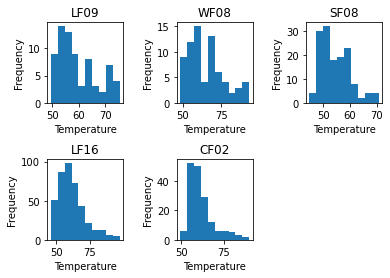

In [8]:
plt.subplots_adjust(hspace=0.7, wspace=0.7)
#Temperature
plt.subplot(2, 3, 1)
plt.hist(LomaFire2009.temp)
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.title("LF09")

#Whitehurst Fire 2008ax0.set_xscale('log') 
plt.subplot(2, 3, 2)
plt.hist(WhitehurstFire2008.temp)
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.title("WF08")

#Summit Fire 2008
plt.subplot(2, 3, 3)
plt.hist(SummitFire2008.temp)
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.title("SF08")

#Loma Fire 2016
plt.subplot(2, 3, 4)
plt.hist(LomaFire2016.temp)
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.title("LF16")

#Croy Fire 2002
plt.subplot(2, 3, 5)
plt.hist(CroyFire2002.temp)
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.title("CF02")

### Humidity

Text(0.5, 1.0, 'CF02')

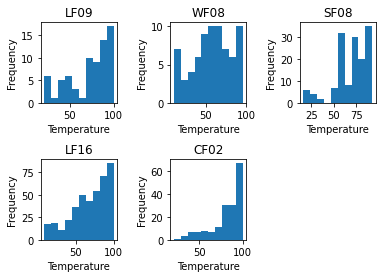

In [9]:
plt.subplots_adjust(hspace=0.7, wspace=0.7)
#Temperature
plt.subplot(2, 3, 1)
plt.hist(LomaFire2009.humidity)
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.title("LF09")

#Whitehurst Fire 2008
plt.subplot(2, 3, 2)
plt.hist(WhitehurstFire2008.humidity)
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.title("WF08")

#Summit Fire 2008
plt.subplot(2, 3, 3)
plt.hist(SummitFire2008.humidity)
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.title("SF08")

#Loma Fire 2016
plt.subplot(2, 3, 4)
plt.hist(LomaFire2016.humidity)
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.title("LF16")

#Croy Fire 2002
plt.subplot(2, 3, 5)
plt.hist(CroyFire2002.humidity)
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.title("CF02")

### Wind Speed

Text(0.5, 1.0, 'CF02')

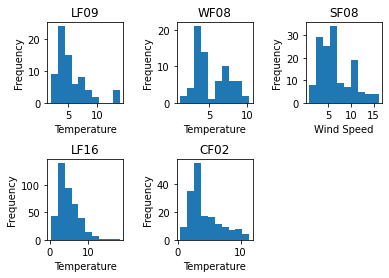

In [28]:
plt.subplots_adjust(hspace=0.7, wspace=0.7)
#Temperature
plt.subplot(2, 3, 1)
plt.hist(LomaFire2009.windspeed)
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.title("LF09")

#Whitehurst Fire 2008
plt.subplot(2, 3, 2)
plt.hist(WhitehurstFire2008.windspeed)
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.title("WF08")

#Summit Fire 2008
plt.subplot(2, 3, 3)
plt.hist(SummitFire2008.windspeed)
plt.ylabel("Frequency")
plt.xlabel("Wind Speed")
plt.title("SF08")

#Loma Fire 2016
plt.subplot(2, 3, 4)
plt.hist(LomaFire2016.windspeed)
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.title("LF16")

#Croy Fire 2002
plt.subplot(2, 3, 5)
plt.hist(CroyFire2002.windspeed)
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.title("CF02")

### Cloudiness

Text(0.5, 1.0, 'CF02')

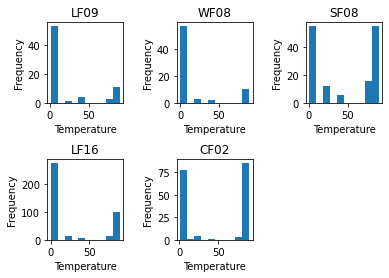

In [10]:
plt.subplots_adjust(hspace=0.7, wspace=0.7)
#Temperature
plt.subplot(2, 3, 1)
plt.hist(LomaFire2009.cloudiness)
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.title("LF09")

#Whitehurst Fire 2008
plt.subplot(2, 3, 2)
plt.hist(WhitehurstFire2008.cloudiness)
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.title("WF08")

#Summit Fire 2008
plt.subplot(2, 3, 3)
plt.hist(SummitFire2008.cloudiness)
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.title("SF08")

#Loma Fire 2016
plt.subplot(2, 3, 4)
plt.hist(LomaFire2016.cloudiness)
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.title("LF16")

#Croy Fire 2002
plt.subplot(2, 3, 5)
plt.hist(CroyFire2002.cloudiness)
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.title("CF02")

### Rainfall

Text(0.5, 1.0, 'CF02')

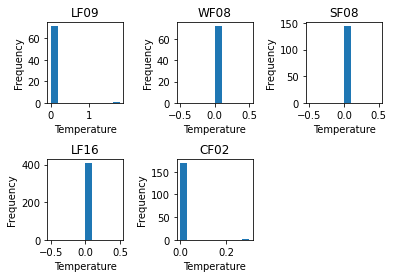

In [11]:
plt.subplots_adjust(hspace=0.7, wspace=0.7)
#Temperature
plt.subplot(2, 3, 1)
plt.hist(LomaFire2009.rain3h)
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.title("LF09")

#Whitehurst Fire 2008
plt.subplot(2, 3, 2)
plt.hist(WhitehurstFire2008.rain3h)
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.title("WF08")

#Summit Fire 2008
plt.subplot(2, 3, 3)
plt.hist(SummitFire2008.rain3h)
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.title("SF08")

#Loma Fire 2016
plt.subplot(2, 3, 4)
plt.hist(LomaFire2016.rain3h)
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.title("LF16")

#Croy Fire 2002
plt.subplot(2, 3, 5)
plt.hist(CroyFire2002.rain3h)
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.title("CF02")

# Part 4: Initial Model Fitting

C:\Users\docto\miniconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\docto\miniconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


city            867
temp            867
humidity        867
windspeed       867
rain3h          867
cloudiness      867
date            867
time            867
1000Acres       867
ID              867
droughtIndex    867
dtype: int64
city          59723
temp          59723
humidity      59723
windspeed     59723
rain3h        59723
cloudiness    59723
date          59723
time          59723
1000Acres     59723
dtype: int64
Accuracy score of model: 0.991307696539583
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     17934
           1       0.84      0.43      0.57       243

    accuracy                           0.99     18177
   macro avg       0.92      0.72      0.78     18177
weighted avg       0.99      0.99      0.99     18177

[[17914    20]
 [  138   105]]


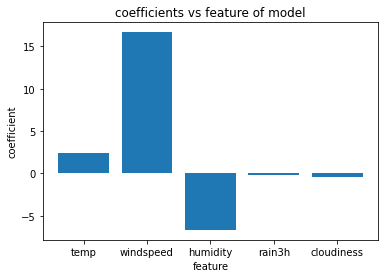

[[0.37231573 0.11698818 1.         0.         0.9       ]
 [0.38914684 0.06285003 0.79347826 0.         0.9       ]
 [0.46851422 0.16303671 0.81521739 0.         0.9       ]
 ...
 [0.48592571 0.10889857 0.80434783 0.         0.9       ]
 [0.3115206  0.08400747 1.         0.         0.9       ]
 [0.27336042 0.11449907 0.91304348 0.         0.9       ]]
[[0.99716912 0.00283088]
 [0.99527947 0.00472053]
 [0.97431429 0.02568571]
 ...
 [0.98815734 0.01184266]
 [0.99858567 0.00141433]
 [0.99618018 0.00381982]]


In [16]:
#imports
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#Sampling non 1000 acre wildfires (period from 2017-2019)
non1000FiresStart = datetime(2017, 1, 1)
non1000FiresStop = datetime(2019, 12, 31)

main_features['date'] = pd.to_datetime(main_features['date'], format="%Y/%m/%d")
non1000Fires = main_features[(main_features.date >= non1000FiresStart) & (main_features.date <= non1000FiresStop)]
non1000Fires = main_features[(main_features.windspeed <= 3) & (main_features.temp <= 65) & (main_features.humidity > 80)]
non1000Fires['1000Acres'] = 0
non1000Fires.to_csv("non1000Fires")

print(wildfires.count())
print(non1000Fires.count())

#concatentating all 1000 acre wildfire and non 1000 acre wildfire data
final_set = pd.concat([wildfires, non1000Fires])
final_set_x = final_set[['temp', 'windspeed', 'humidity', 'rain3h', 'cloudiness']]
final_set_y = final_set['1000Acres']

#Splitting and scaling dataset with train_test_split and min-max normalization
X_train, X_test, y_train, y_test = ms.train_test_split(final_set_x, final_set_y, train_size=0.7,test_size=0.3)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

#Fitting data to Logistic Regression algorithm
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#classification report
print("Accuracy score of model:", model.score(X_test, y_test))
print(classification_report(y_test, y_pred))

#prints number of correct vs incorrect predictions
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

# Assign feature coefficients to 
coefficients = model.coef_
coefficients = coefficients.tolist()[0]

# Plot bar graph of feature coefficients
plt.bar([1,2, 3, 4, 5],coefficients)
plt.xticks([1,2, 3, 4, 5],['temp','windspeed', 'humidity', 'rain3h', 'cloudiness'])
plt.xlabel('feature')
plt.ylabel('coefficient')
plt.title('coefficients vs feature of model')
plt.show()

#Print output probabilities for test set
print(X_test)
y_pred_array = model.predict_proba(X_test)
print(y_pred_array)

